In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from scipy.special import expit
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import StratifiedKFold
from scipy import interp

In [118]:
iris_data = '/home/hurben/AnalysisLibrary/machine_learning/iris.2class.txt'
iris_dataframe = pd.read_csv(iris_data, sep="\t")

#print (iris_dataframe.iloc[:,1])
#print (iris_dataframe.iloc[:,4])

x_list = []
y_list = []
for i in range (len(iris_dataframe)):
    x_value = iris_dataframe.iloc[i,1]
    y_label = iris_dataframe.iloc[i,4]
    if y_label == 0 or y_label == 1:
        x_list.append([x_value])
        y_list.append(y_label)


#x_list = iris_dataframe.iloc[:,1:4]
#y_list = iris_dataframe.iloc[:,4]

# #Always check input
print (x_list)
print (y_list)
print ("label type %s , length %s" %(type(x_list), len(x_list)))
print ("label type %s , length %s" % (type(y_list), len(y_list)))
# print (type(y_list), len(y_list))
# #####

X = np.asarray(x_list)
y = np.asarray(y_list)

print (X)

[[3.5], [3.0], [3.2], [3.1], [3.6], [3.9], [3.4], [3.4], [2.9], [3.1], [3.7], [3.4], [3.0], [3.0], [4.0], [4.4], [3.9], [3.5], [3.8], [3.8], [3.4], [3.7], [3.6], [3.3], [3.4], [3.0], [3.4], [3.5], [3.4], [3.2], [3.1], [3.4], [4.1], [4.2], [3.1], [3.2], [3.5], [3.1], [3.0], [3.4], [3.5], [2.3], [3.2], [3.5], [3.8], [3.0], [3.8], [3.2], [3.7], [3.3], [3.2], [3.2], [3.1], [2.3], [2.8], [2.8], [3.3], [2.4], [2.9], [2.7], [2.0], [3.0], [2.2], [2.9], [2.9], [3.1], [3.0], [2.7], [2.2], [2.5], [3.2], [2.8], [2.5], [2.8], [2.9], [3.0], [2.8], [3.0], [2.9], [2.6], [2.4], [2.4], [2.7], [2.7], [3.0], [3.4], [3.1], [2.3], [3.0], [2.5], [2.6], [3.0], [2.6], [2.3], [2.7], [3.0], [2.9], [2.9], [2.5], [2.8]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

0.75
0.85
0.85
0.8
0.85


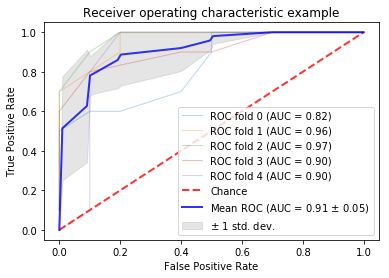

In [120]:
cv = StratifiedKFold(n_splits=5)
#classifier = svm.SVC(kernel='linear', probability=True, random_state=random_state)
classifier = LogisticRegression()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0


for train, test in cv.split(X, y):

    classifier.fit(X[train],y[train])
    predict = classifier.predict(X[test])
    accuracy = sum(1 for x,y in zip(predict,y[test]) if x == y) / float(len(y[test]))
    
    print (accuracy)
        
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    predict = classifier.predict(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
